## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Import the EchoStateNetwork class (assuming it is saved in `esn.py` in the same directory)from pyEchoStateNetwork.ESN_class import *
from pyEchoStateNetwork.ESN_class import *

Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
Reservoir spectral radius scaled to: 1.1999999999992133
Reservoir weights spectral radius scaling completed.


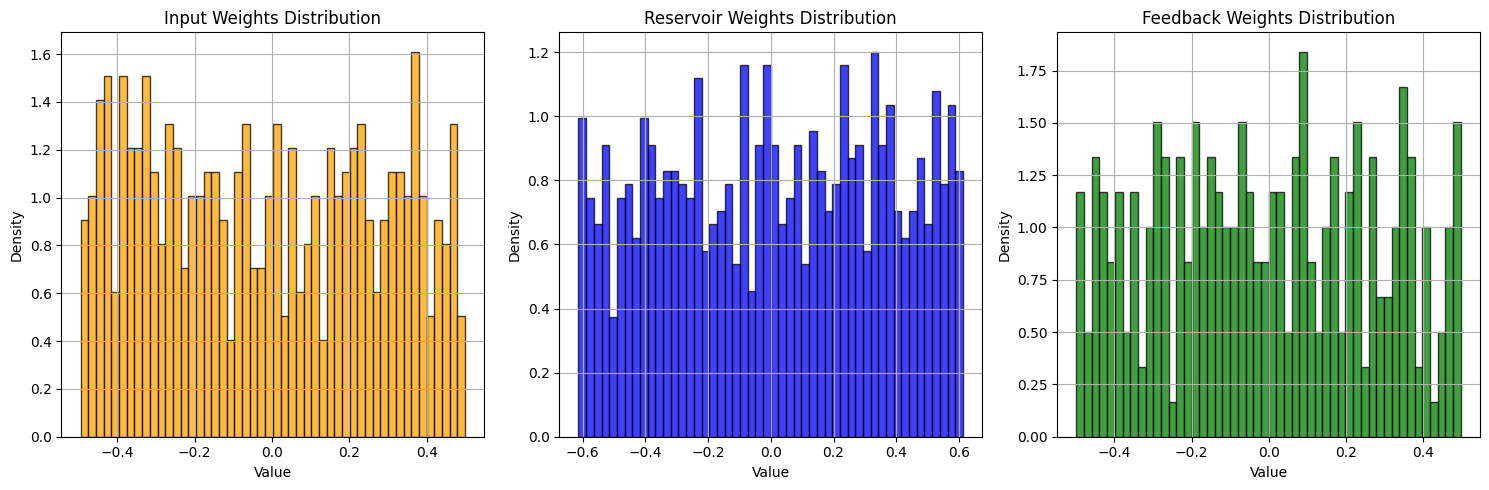


=== Matrix Shapes ===
Matrix         Shape               
-----------------------------------
W_res          (100, 100)          
W_in           (100, 5)            
W_fb           (100, 3)            


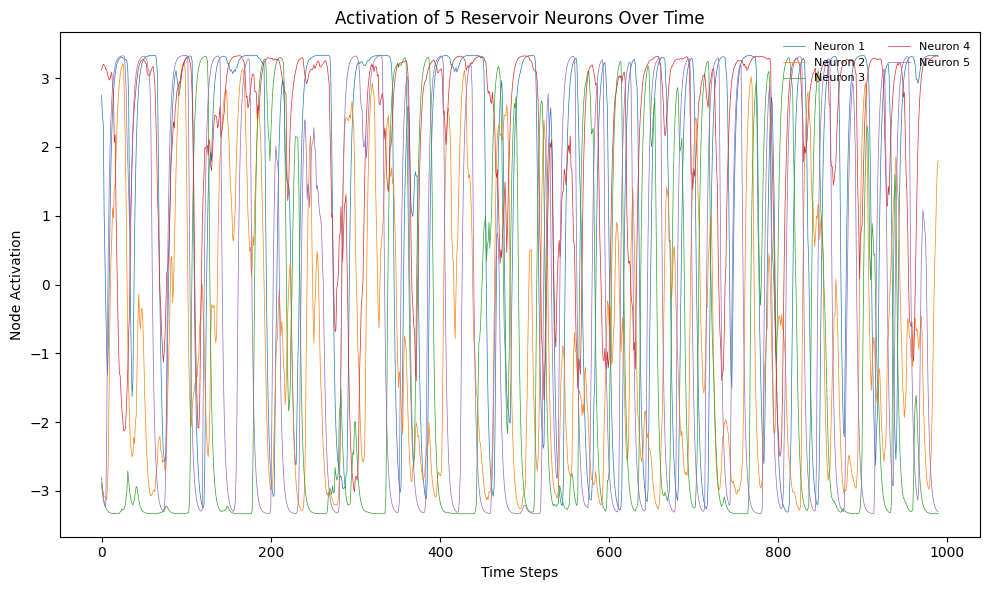

XX^T has shape: (105, 105)
YX^T has shape: (3, 105)
Feedback stability test passed successfully.


In [5]:
default_params = {
    "input_dim": 1,
    "nodes": 500,
    "output_dim": 1,
    "distribution": "uniform",
    "leak": 0.3,
    "connectivity": 0.1,
    "spectral_radius": 1.0,
    "seed": 42,
    "bias": False,
    "enable_feedback": False,
    "input_scaling": None,
    'teacher_scaling': None,
    "noise": 0.00,
}

def test_feedback_stability():
    params = default_params.copy()
    params["input_dim"] = 5  # Input size
    params["output_dim"] = 3  # Feedback size
    params["nodes"] = 100  # Reservoir size
    params["enable_feedback"] = True  # Enable feedback
    params["spectral_radius"] = 1.2  # Moderate spectral radius to avoid instability
    params["leak"] = 0.3  # Moderate leaking rate

    # Initialise ESN with feedback enabled
    esn = EchoStateNetwork(params, verbose=2, dtype="float64")
    esn.initialize_reservoir()

    # Generate dummy input and feedback signals over multiple timesteps
    timesteps = 1000  # Long enough to observe stability
    input_signal = esn.rng.random((params["input_dim"], timesteps))
    target_signal = esn.rng.random((params["output_dim"], timesteps))

    # Acquire reservoir states (Shape: [N, T])
    reservoir_states = esn.acquire_reservoir_states(input_signal, target_signal, visualized_neurons=5, burn_in=10)

    # Compute absolute state values over time
    max_state_per_timestep = np.max(np.abs(reservoir_states), axis=0)  # Shape: [T]
    
    # Compute the difference between successive reservoir states (gradient)
    state_differences = np.diff(reservoir_states, axis=1)  # Shape: [N, T-1]
    max_state_diff = np.max(np.abs(state_differences))  # Check the largest absolute change

    # Ensure reservoir states do not diverge (stay within a reasonable bound)
    assert np.all(max_state_per_timestep < 10), \
        f"Reservoir states diverging! Max state magnitude exceeded 10. Observed: {np.max(max_state_per_timestep)}"

    # Ensure changes between states are not growing exponentially
    assert max_state_diff < 5, \
        f"Reservoir states changing too drastically! Max observed change: {max_state_diff}"

    print("Feedback stability test passed successfully.")
    
test_feedback_stability()

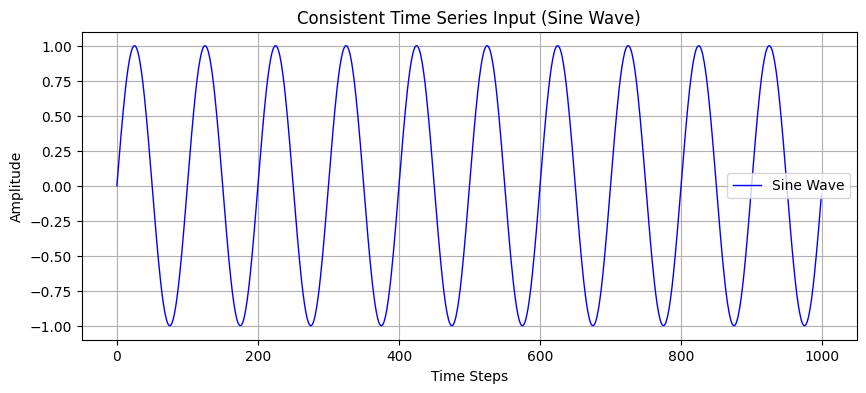

In [2]:
# Generate a consistent sine wave time series
timesteps = 1000
frequency = 0.01
time = np.arange(timesteps)
input_series = np.sin(2 * np.pi * frequency * time)  # A simple sine wave

# Plot the generated time series
plt.figure(figsize=(10, 4))
plt.title("Consistent Time Series Input (Sine Wave)", fontsize=12)
plt.plot(time, input_series, label="Sine Wave", color='blue', lw=1)
plt.xlabel("Time Steps", fontsize=10)
plt.ylabel("Amplitude", fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

In [22]:
# Network parameters for testing.
ESN_params = {
    "input_dim": 1,
    "nodes": 500,
    "output_dim": 1,
    "distribution": "normal",
    "leak": 0.3,
    "connectivity": 0.1,
    "spectral_radius": 1.0,
    "seed": 42,
    "bias": False,
    "enable_feedback": False,
    "input_scaling": None,
    'teacher_scaling': None,
    "noise": 0.00,
}

Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 7.033498981876317
Reservoir spectral radius scaled to: 1.0130218201571783
Reservoir weights spectral radius scaling completed.


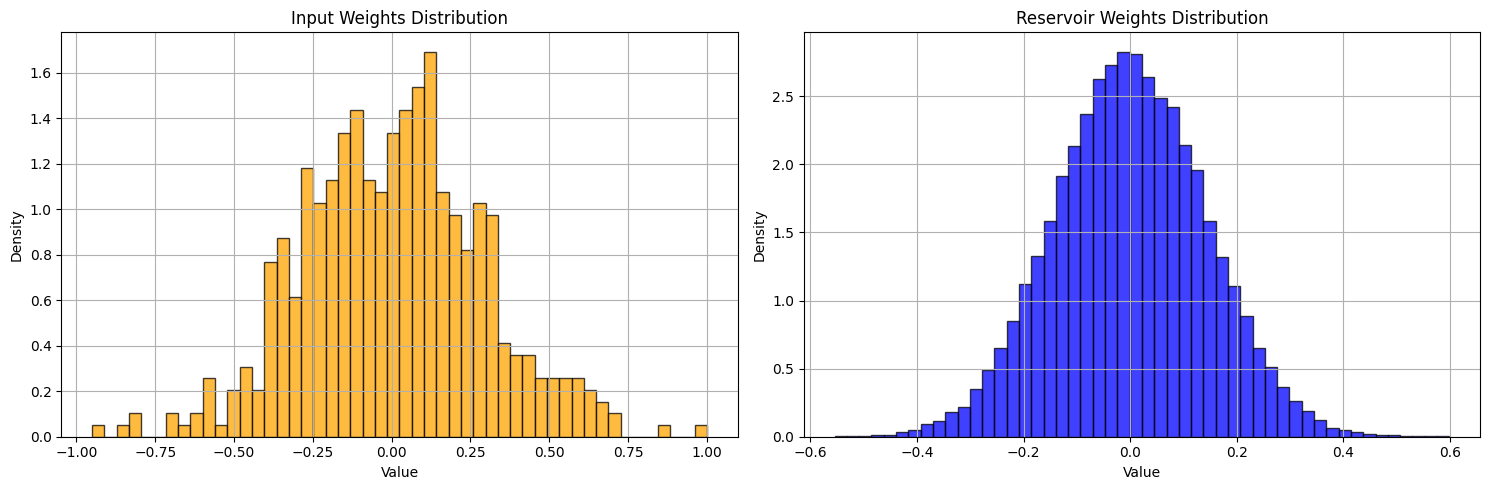


=== Matrix Shapes ===
Matrix         Shape               
-----------------------------------
W_res          (500, 500)          
W_in           (500, 1)            
W_fb           None                
Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (500, 500)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/pyEchoStateNetwork/generated_weights


In [23]:
# Setup network
esn = EchoStateNetwork(ESN_params, verbose=2)

esn.initialize_reservoir()

In [16]:
# Assuring that the input series has shape (K, timesteps)
input_series_reshaped = input_series.reshape(1, -1)
input_series_reshaped.shape

teacher_signal = input_series_reshaped.copy()

Scaled inputs shape: (2, 1000)
Number of timesteps: 1000
States shape: (500, 1000)
Reservoir shape: (500, 500)
Input weights shape: (500, 2)


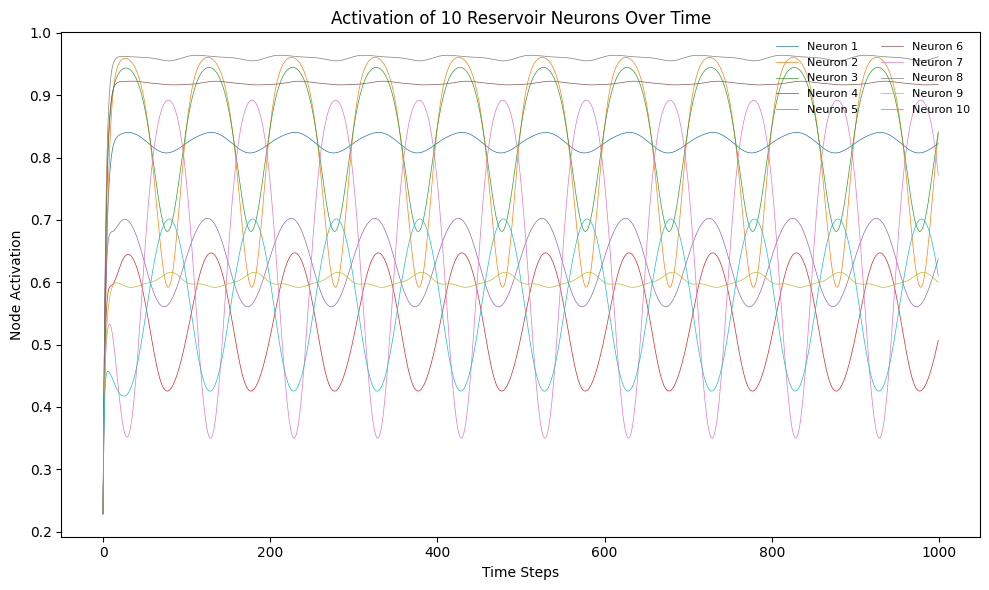

In [17]:
states = esn.acquire_reservoir_states(inputs=input_series_reshaped, visualized_neurons=10, burn_in=0, teachers=teacher_signal)

## Testing correct weight generation

In [3]:
def test_weight_generation(ESN_params=ESN_params):

    # Create an instance of EchoStateNetwork
    esn = EchoStateNetwork(ESN_params, verbose=3)

    # Test 1: Initialising reservoir with normal distribution
    print("\nTesting with Normal Distribution:")
    W_res_normal = esn.initialize_reservoir(distribution='normal')
    print(f"Spectral radius after scaling: {np.max(np.abs(np.linalg.eigvals(esn.W_res.toarray()))):.4f}")

    # # Test 2: Initialising reservoir with uniform distribution
    print("\nTesting with Uniform Distribution:")
    W_res_uniform = esn.initialize_reservoir(distribution='uniform')
    print(f"Spectral radius after scaling: {np.max(np.abs(np.linalg.eigvals(esn.W_res.toarray()))):.4f}")


Testing with Normal Distribution:
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 10.10884306125603
Reservoir spectral radius scaled to: 0.9153280245605707
Reservoir weights spectral radius scaling completed.


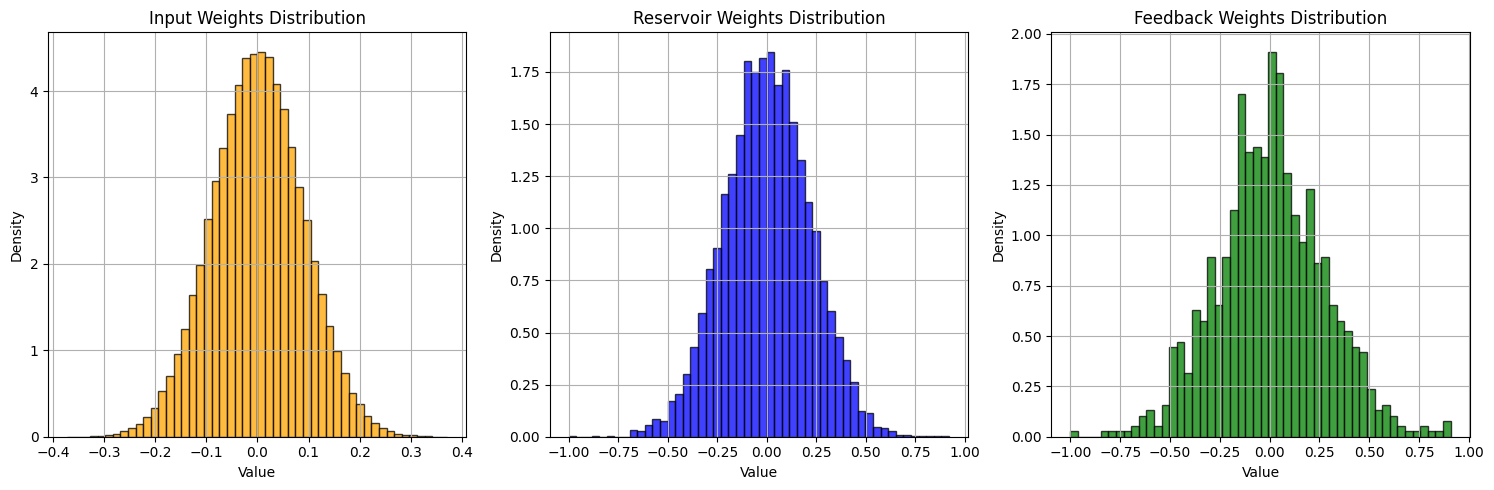

Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (1000, 1000)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights
Spectral radius after scaling: 0.9153

Testing with Uniform Distribution:
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 5.906986149653661
Reservoir spectral radius scaled to: 0.8999999999911126
Reservoir weights spectral radius scaling completed.


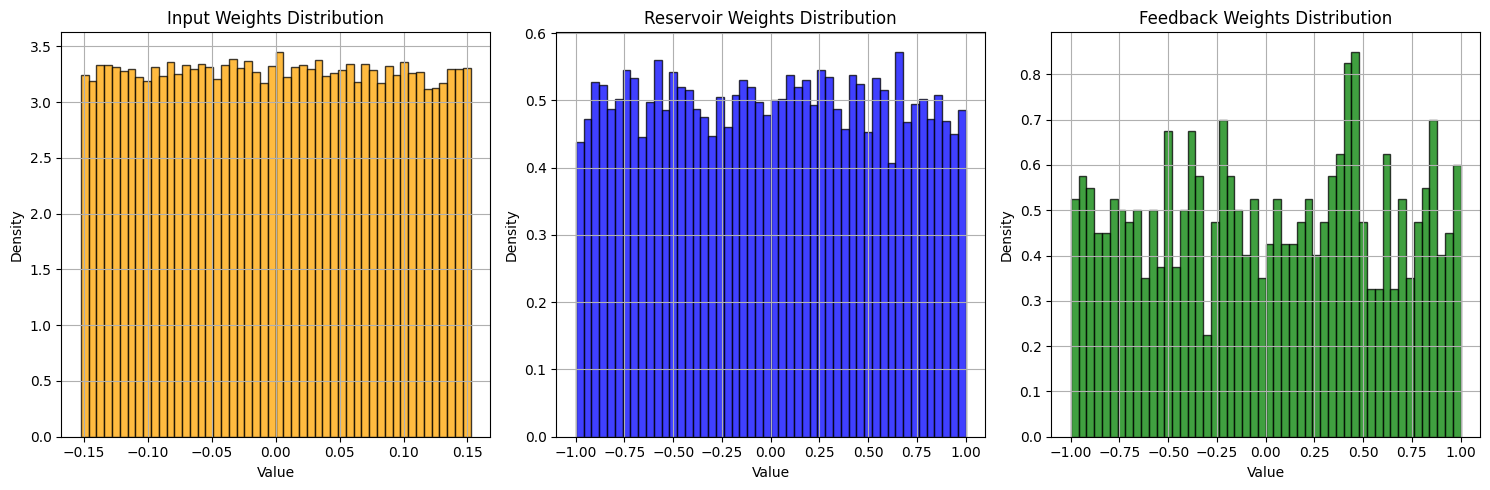

Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (1000, 1000)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights
Spectral radius after scaling: 0.9000


In [4]:
test_weight_generation()

## Checking for consistency between iterations.

In [5]:
# Checking for consistency between iterations:
esn1 = EchoStateNetwork(ESN_params, verbose=1)
esn1.initialize_reservoir()
esn2 = EchoStateNetwork(ESN_params, verbose=1)
esn2.initialize_reservoir()
print(np.allclose(esn1.W_res.data, esn2.W_res.data))  # Should print True

Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 10.281008166481563
Reservoir spectral radius scaled to: 0.8849286575812305
Reservoir weights spectral radius scaling completed.
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 9.98734191884879
Reservoir spectral radius scaled to: 0.926463459952349
Reservoir weights spectral radius scaling completed.
False


## Testing that feedback works, the matrices are the correct shapes, and that they are written to a neighbouring directory.

Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 3.3129357718805634
Reservoir spectral radius scaled to: 1.2000000000040825
Reservoir weights spectral radius scaling completed.


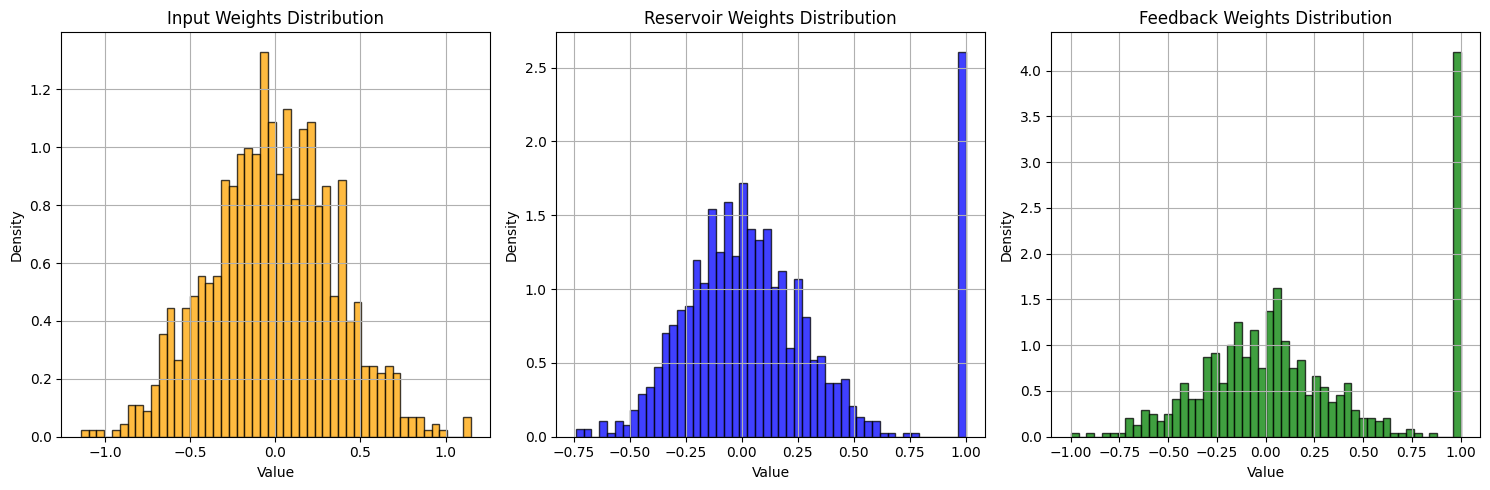

Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (100, 100)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights

=== Matrix Shapes ===
W_res Shape: (100, 100)
W_in Shape: (100, 11)
W_fb Shape: (100, 6)

=== Bias Verification ===
W_in Bias Column: True
W_fb Bias Column: True


NameError: name '__file__' is not defined

In [6]:
# Test Script for EchoStateNetwork
def test_esn():
    # Define ESN parameters for testing
    ESN_params = {
        'input_dim': 10,      # K
        'nodes': 100,         # N
        'output_dim': 5,      # L
        'ridge': 1e-4,        # Ridge regression penalty
        'leak': 0.3,          # Leak rate
        'connectivity': 0.1,  # Reservoir sparsity
        'input_scaling': 0.5, # Input scaling
        'spectral_radius': 1.2,  # Spectral radius
        'seed': 42,           # RNG seed
        'bias': True,         # Include bias
        'enable_forcing': True,  # Enable feedback
        'train_length': 1000, # Training length
        'prediction_length': 500, # Prediction length
    }

    # Instantiate the EchoStateNetwork
    esn = EchoStateNetwork(ESN_params, verbose=3)

    # Test reservoir initialization (normal distribution)
    esn.initialize_reservoir(distribution='normal')

    # Test shapes of the matrices
    print("\n=== Matrix Shapes ===")
    print(f"W_res Shape: {esn.W_res.shape}")  # Expected: (N, N)
    print(f"W_in Shape: {esn.W_in.shape}")    # Expected: (N, K+1) if bias=True
    if esn.enable_feedback:
        print(f"W_fb Shape: {esn.W_fb.shape}")  # Expected: (N, L+1) if bias=True
    else:
        print("W_fb: None")

    # Check if bias column is correctly applied
    if esn.bias:
        print("\n=== Bias Verification ===")
        print("W_in Bias Column:", np.all(esn.W_in[:, 0] == 1))  # Should print True
        if esn.enable_feedback:
            print("W_fb Bias Column:", np.all(esn.W_fb[:, 0] == 1))  # Should print True

    # Check if data has been saved
    output_dir = os.path.join(os.path.dirname(__file__), "Generated_Weights")
    print("\n=== File Saving Verification ===")
    print(f"Files saved in directory: {output_dir}")
    print("W_res.csv exists:", os.path.exists(os.path.join(output_dir, "W_res.csv")))
    print("W_in.csv exists:", os.path.exists(os.path.join(output_dir, "W_in.csv")))
    if esn.enable_feedback:
        print("W_fb.csv exists:", os.path.exists(os.path.join(output_dir, "W_fb.csv")))

    # Test histogram plotting
    print("\n=== Histogram Plotting ===")
    esn.plot_reservoir_histogram()

# Run the test
if __name__ == "__main__":
    test_esn()